## OSRM (Open Source Routing Machine) on Ubuntu 22.04

OSRM is an open-source software project that provides high-performance routing services. It allows you to calculate routes, distances, and travel times between locations based on various transportation modes such as car, bicycle, and pedestrian. OSRM is designed to efficiently process large-scale road network data and provide fast and accurate routing results.

## OSRM Tutorial

An OSRM tutorial is a step-by-step guide that introduces users, including students with minimal coding experience, to the basic concepts and functionalities of OSRM. It provides instructions and examples on how to install, configure, and utilise OSRM for calculating routes and performing various routing-related tasks, enabling users to quickly grasp the essentials of using OSRM for their routing needs.

## OSRM Tutorial Outline:

### Prerequisites:

    Hardware requirements: Linux Ubuntu 20.04 or 22.04 distro.
    Software prerequisites: Required libraries and packages.

### Setting up the Linux Environment:

    Instructions for setting up the Linux environment.
    Installation of necessary libraries and packages.

### Cloning OSRM-Backend from GitHub:

    How to clone the OSRM-Backend repository from GitHub.
   
### OSRM Installation:

    Detailed installation instructions for OSRM.
    Build and installation process as user.
    Troubleshooting common installation issues.
   
### Retrieving and Generating OSRM Routing Data:

    Obtaining routing data, including OpenStreetMap (OSM) data.
    Using osrm-extract utilities for data preprocessing.

### Making Requests and Handling Output:

    Making routing requests to the OSRM server.
    Understanding the response format.
    Storing output in different formats (GeoJSON, CSV, etc.).

### Visualising Data Using Maps:

    Introduction to data visualisation using maps.
    Integration with mapping libraries like Folium.
    Plotting routes and adding markers on the map.

### Integrating Data into Visualisations:

    Combining OSRM routing data with other datasets.
    Overlaying additional information on the map (points of interest, traffic data, etc.).

### Advanced Topics (Optional):
    
    Reading location files and store results in route file.
    Exploring advanced features and configurations of OSRM.
    Customising OSRM profiles for specific routing scenarios.

Throughout the tutorial, we will provide clear instructions, code examples, and explanations to help users understand and utilise OSRM effectively for routing needs.

Note: In this tutorial to separate text from commands, the `$` symbol is used to represent the command line prompt. All commands with `$` at the beginning can be run in a bash terminal. Also, when we mention the parent directory, we mean the osrm directory cloned from the GitHub repository. 

https://github.com/mzrghorbani/osrm-tutorial.git

## Prerequisites:

This is a very important part of the tutorial and the osrm project. The osrm software seems to work better with a fresh installation of Linux distribution because there are fewer conflicts with the following prerequisites. The most important required packages are boost, tbb and lua. Try to install the versions of the software mentioned in this section. The installation has been verified on several Ubuntu machines and must work with the prerequisites below:

    System: Linux Ubuntu 20.04 or 22.04 distro.
    
Software prerequisites:
    
    CMake (version 3.5 or higher)
    GCC/G++ (GNU Compiler Collection)
    Git
    pkg-config
    Doxygen
    
These software packages need to be installed separately on Ubuntu:

    libboost-all-dev
    libtbb-dev
    lua5.2
    liblua5.2-dev
    libluabind-dev
    libstxxl-dev
    libstxxl1v5
    libxml2
    libxml2-dev
    libosmpbf-dev
    libbz2-dev
    libzip-dev
    libprotobuf-dev
    
Please make sure to install these packages using the respective package manager on Ubuntu before proceeding with the OSRM installation:

```bash
$ sudo apt update

$ sudo apt install build-essential git cmake pkg-config doxygen \
libboost-all-dev libtbb-dev lua5.2 liblua5.2-dev libluabind-dev \
libstxxl-dev libstxxl1v5 libxml2 libxml2-dev libosmpbf-dev \
libbz2-dev libzip-dev libprotobuf-dev
```

## Use CMake to detect software:

To ensure the required software is accessible by the system cmake, please run the cmake commands below:

```cmake
cmake_minimum_required(VERSION 3.18)
project(check_installations)

message("Checking OSRM required installations on your system")

message("Check for Boost") find_package(Boost REQUIRED COMPONENTS system iostreams) if(Boost_FOUND) message(STATUS "Boost found: ${Boost_INCLUDE_DIRS}") else() message(FATAL_ERROR "Boost not found. Please install libboost-all-dev.") endif()

message("Check for TBB") find_package(TBB REQUIRED) if(TBB_FOUND) message(STATUS "TBB found: ${TBB_INCLUDE_DIRS}") else() message(FATAL_ERROR "TBB not found. Please install libtbb-dev.") endif()

message("Check for Lua") find_package(Lua 5.2 REQUIRED) if(LUA_FOUND) message(STATUS "Lua found: ${LUA_INCLUDE_DIR}") else() message(FATAL_ERROR "Lua not found. Please install lua5.2 and liblua5.2-dev.") endif()

message("Check for Doxygen") find_package(Doxygen) if(DOXYGEN_FOUND) message(STATUS "Doxygen found: ${DOXYGEN_EXECUTABLE}") else() message(FATAL_ERROR "Doxygen not found. Please install doxygen.") endif()

message("Installation test completed. Please check for errors!")
```

We have provided a copy of the commands in CMakeLists.txt in the parent directory of GitHub repository.

Note that running CMakeLists.txt will generated many build files, therefore it is recommended to create a build/ directory in the project parent directory and run cmake in there.

Run the CMakeLists.txt in `osrm-tutorial/` directory by:

```bash
mkdir -p build/
cd build/
$ cmake ..
```

If you see a cmake message similar to this:

```bash
CMake Error at CMakeLists.txt:1 (cmake_minimum_required):
  CMake 3.18 or higher is required.  You are running a lower version 
```

Please upgrade your cmake installation by:

Visiting cmake releases at:

https://github.com/Kitware/CMake/releases

And follow the instructions below to download cmake (no installation):

```bash
$ mkdir -p $HOME/cmake-3.27
$ cd $HOME/cmake-3.27
$ wget https://github.com/Kitware/CMake/releases/download/v3.27.0-rc2/cmake-3.27.0-rc2-linux-x86_64.tar.gz
$ tar -zxvf cmake-3.27.0-rc2-linux-x86_64.tar.gz
$ rm cmake-3.27.0-rc2-linux-x86_64.tar.gz
```

Check new cmake installation version in `$HOME/cmake-3.27` directory:

```bash
cmake-3.27.0-rc2-linux-x86_64/bin/cmake --version
```

You should see an output like this:

```bash
cmake version 3.27.0-rc2

CMake suite maintained and supported by Kitware (kitware.com/cmake).
```

Note: If you followed the instructions and placed the cmake in `$HOME/cmake-3.27` directory, you can use it by addressing it by its full path:

```bash
$HOME/cmake-3.27/cmake-3.27.0-rc2-linux-x86_64/bin/cmake --help
```
Now you can return to the previous task before downloading cmake latest version (June 2023). 

If the path it too long, you can create an alias and export it as:

```bash
$ alias cmake327="/home/mghorbani/cmake-3.27/cmake-3.27.0-rc2-linux-x86_64/bin/cmake"
```

And try it as:

```bash
$ cmake327 --version
```

The effect of the alias is temporary, but you can add the line in `$HOME/.bashrc` to make it permanent. 

## Troubleshooting: 

If any of the software installation commands return an error, please install them separately and make sure their installation directories are added to the system path to be discoverable by cmake. 

Following the successful completion of the test, the build directory can be deleted.

```bash
rm -rf build/
```

## Cloning OSRM-Backend from GitHub:

Please clone the osrm-backend in the parent directory (osrm-tutorial) by:

```bash
$ git clone https://github.com/Project-OSRM/osrm-backend.git
```

## OSRM Pre-installation:

Before installation, we set CXXFLAGS variable to ensure that the compiler recognises and applies the necessary settings for Boost. This helps to avoid any warnings or errors related to deprecated headers or bind placeholders during the compilation process.

```bash
$ export CXXFLAGS="-DBOOST_ALLOW_DEPRECATED_HEADERS -DBOOST_BIND_GLOBAL_PLACEHOLDERS"
```

## OSRM Installation (as user / no admin):

In **osrm-tutorial/** directory:

```bash
$ mkdir -p osrm-install/
```

Then build and install osrm-backend by the instructions below. When executing make, you can pass (-j <no of processes>) to faster the process.

```bash
$ cd osrm-backend/
$ mkdir -p build/
$ cd build/
$ cmake -DCMAKE_INSTALL_PREFIX="../../osrm-install" ..
$ make -j 4
$ make install
```

Following the installation, export the bin directory in osrm-install.

In build/ directory:

```bash
$ realpath ../../osrm-install/bin
```

Add the actual path to the line below and execute it.

```bash
$ export PATH="/path/to/osrm-tutorial/osrm-install/bin:$PATH"
```

Please make sure you replaced "/path/to/" with the actual full-path to the osrm-tutorial directory.

To make the effects permanent, place the command in `$HOME/.bashrc` file.

After installation is completed, the parent directory will have directories:

```bash
osrm-backend/
osrm-install/
build/
CMakeFiles/ (if you run the CMakeLists.txt prerequisite testing script)
```

Following the successful completion of the test, the builds directories can be deleted. (optional)

```bash
$ rm -rf build/
```

## Known Issues During OSRM-backend Installation:

This issue can be experienced in the Linux Ubuntu20.04 system during the make process: 

```bash
undefined reference to `lua_newuserdatauv'
collect2: error: ld returned 1 exit status
```
If this occurs, please restart the installation process by specifying the Lua5.2 directory as:

```bash
$ cd osrm-backend/
$ mkdir -p build/
$ cd build/
$ cmake -DCMAKE_INSTALL_PREFIX="../../osrm-install" -DLUA_INCLUDE_DIR="/usr/include/lua5.2" ..
$ make -j 4
$ make install
```

If similar issues occur for any other libraries (e.g., TBB, Boost and Doxygen), specify installation prefixes to be searched by cmake using `-DCMAKE_PREFIX_PATH="paths"`. Separate the paths by `;` semicolon.

## Brief Description of Installed OSRM Executables:

To use the OSRM executables, it is generally recommended to follow the sequence of steps outlined below:

**osrm-extract:** 
This executable is used to extract the street network data from OpenStreetMap (OSM) data and convert it into the OSRM-specific format. You typically provide the OSM data file as input and specify the desired options, such as the profile to use and any additional restrictions or customizations.

**Example command:**
osrm-extract map.osm.pbf -p profile.lua
The output of this step is a preprocessed .osrm file containing the street network data in a format optimized for routing.

**osrm-partition:**
osrm-partition: This executable performs a spatial partitioning of the preprocessed street network data to enable efficient routing queries. It splits the data into smaller regions, which improves query performance. This step is optional but recommended for larger datasets.

**Example command:**
osrm-partition map.osrm
This step generates a .osrm.partition file that stores the partitioned data.

**osrm-customize:**
This executable further optimizes the routing data to improve query performance. It modifies the preprocessed data based on heuristics and optimization techniques specific to OSRM.

**Example command:**
osrm-customize map.osrm
The output of this step is a final .osrm file that is ready for routing queries.

**osrm-routed:** 
This executable starts the OSRM server, allowing you to make routing queries via HTTP requests or use the OSRM API. It loads the final .osrm file and provides a server interface to handle routing requests.

**Example command:**
osrm-routed map.osrm
After executing this command, the OSRM server will start and listen for routing queries on a specified port (default is 5000).

**osrm-contract:**
osrm-contract command should be executed after the osrm-extract step and before the osrm-routed step. It takes the preprocessed .osrm file as input and generates a contracted .osrm file.

**Example command:**
osrm-contract map.osrm
The contracted .osrm file produced by osrm-contract is used in the subsequent osrm-routed step to start the OSRM server and handle routing queries.

## Retrieving OSRM Routing Data:

The initial OpenStreetMap (osm) map data must be downloaded (into the osrm-backend directory, possibly) from https://planet.openstreetmap.org/pbf/ in pbf.  PBF stands for Protocolbuffer Binary Format. It is a binary data format used for efficiently storing and exchanging structured data. PBF is commonly used in the context of geographic data, particularly for storing and distributing OSM data.

Other available sources:

http://download.geofabrik.de

https://download.bbbike.org/osm/

Note: The larger the geographical location is, the bigger the pbf file would be. 

The largest available is the map of planet exists in pbf here:

http://planet.openstreetmap.org/pbf/planet-latest.osm.pbf 

with almost **60G** of data.

## Get .pbf data

You can also use the command below to download a file to osrm-backend directory: (disk space warning) 

```bash
$ wget -c http://planet.openstreetmap.org/pbf/planet-latest.osm.pbf -P /path/to/osrm-tutorial/osrm-backend
```

For a map of an individual country, state, province or city, go to http://download.geofabrik.de and download the map. In this instance, Great Britain with almost **1.5G** with the following command:

```bash
$ wget -c http://download.geofabrik.de/europe/great-britain-latest.osm.pbf -P /path/to/osrm-backend
```

Note: Please make sure to replace "/path/to/" with the actual path of osrm-backend/ or use `wget` in osrm-beckend/ without the `-P /path/to/osrm-backend` option.

Following the download, great-britain-latest.osm.pbf will be present in osrm-backend directory.

## Generating OSRM Routing Data:

If you have added the path to OSRM executables to your system PATH (export PATH="/path/to/osrm-install/bin:$PATH") successfully, running the command below:

```bash
$ osrm-`double-tab`
```
    
Should return:

osrm-components<br>
osrm-contract<br>
osrm-customize<br>
osrm-datastore<br>
osrm-extract<br>
osrm-partition<br>
osrm-routed
    
You can now execute the command below in osrm-backend/ directory:

```bash
$ osrm-extract great-britain-latest.osm.pbf --threads=10
```

Note that executing this command might take a long time even with more threads. Consider using `screen` to avoid interruptions during the process.

## Running commands in screen

`screen` is a terminal multiplexer that allows you to create multiple virtual terminal sessions within a single terminal window or SSH session. It provides a way to run commands and applications that need to keep running even after you disconnect from the terminal or SSH session.

Some useful commands in `screen`:

screen: Start a new screen session.<br>
Ctrl + A, C: Create a new window within the screen session.<br>
Ctrl + A, N: Switch to the next window.<br>
Ctrl + A, P: Switch to the previous window.<br>
Ctrl + A, ": Show a list of all windows for easy selection.<br>
Ctrl + A, A: Rename the current window.<br>
Ctrl + A, D: Detach from the screen session (leave it running in the background).

screen -r: Reattach to a detached screen session.<br>
screen -ls: List all active screen sessions.

exit or Ctrl + D: Close a terminal session inside a screen window.

Screen provides many more features and commands. You can refer to the screen documentation or use the man screen command for more detailed information.

Here's an example of running the osrm-extract command in screen:

1. In osrm-backend directory, start a new screen session with name osrm. 

```bash
$ screen -S osrm
```

2. Run the osrm-extract command within the screen session:

```bash
$ osrm-extract great-britain-latest.osm.pbf --threads=10
```

3. Detach from the screen session by pressing Ctrl + A, then D. This leaves the process running in the background.

To reattach to the screen session later, use the following command:

```bash
$ screen -r osrm
```

This will bring you back to the osrm screen session and allow you to check the progress or interact with the osrm-extract process.

To list active screen sessions, if any, along with their session IDs and status, run:

```bash
$ screen -ls
```

For example, the output may look like this:

```bash
There is a screen on:
        22478.osrm      (06/13/23 18:45:12)     (Detached)
1 Socket in /run/screen/S-mghorbani.
```

Following the execution of osrm-extract, many extracted files will appear in osrm-backend/ directory.

## Additioanl Information

By default, lua.car (script) is used during the data processing step. The script is used by the osrm-extract command to extract relevant data from OpenStreetMap files and generate a custom routing graph. 

The Lua script defines the routing profile, including the road network attributes, vehicle restrictions, speed limits, and other factors that influence the routing decisions made by OSRM. The generated routing graph is then used by other OSRM components, such as osrm-routed, to provide routing services based on the defined profile.

The lua.car or a custom profile (profile.lua below) contains Lua script defining the routing profile with specific attributes and restrictions like:

```lua
-- profile.lua script:

-- Configuration for car routing

-- Define the vehicle profile
local profile = {
  default_speed = 30,  -- Default speed in kilometers per hour
  highway_speeds = {
    motorway = 100,  -- Speed on motorways
    primary = 70,    -- Speed on primary roads
    secondary = 50,  -- Speed on secondary roads
    tertiary = 40    -- Speed on tertiary roads
  },
  access = {  -- Access restrictions
    ["private"] = false,  -- Private roads not accessible
    ferry = true          -- Ferries are accessible
  },
  turn_costs = {  -- Turn costs in seconds
    default = 0,     -- Default turn cost
    ["turn"] = 5,    -- Cost for normal turns
    ["sharp_turn"] = 10,  -- Cost for sharp turns
    ["uturn"] = 20        -- Cost for U-turns
  }
}

-- Function to apply the profile
function process_way(profile, way, result)
  -- Set the speed based on the highway type
  local highway = way:get_value_by_key("highway")
  local speed = profile.highway_speeds[highway] or profile.default_speed
  result.forward_speed = speed
  result.backward_speed = speed

  -- Set the access restriction
  local access = way:get_value_by_key("access")
  if profile.access[access] ~= nil then
    result.forward_access = profile.access[access]
    result.backward_access = profile.access[access]
  end
end

-- Apply the profile to ways
way_handler = process_way

-- Return the profile
return profile
```

A completed script can be added to osrm-extract execution, optionally by:

```bash
$ osrm-extract great-britain-latest.osm.pbf -p profile.lua --threads=10
```

## Partition Map Recursively into Cells:

You can either run this command in `screen` or in current terminal:

```bash
$ osrm-partition great-britain-latest.osrm
```

Note that this command can take a long time to complete.

## Customize Map Cells:

You can customise the cells by calculating routing weights for all cells by command:

```bash
$ osrm-customize great-britain-latest.osrm
```

This command also may take a long time to complete.

## Run OSRM Engine:

To ensure the continuous operation of the OSRM engine, it is recommended to start it within a screen session, which allows the process to run in the background even when you disconnect from the terminal. This way, you can start the OSRM engine, detach from the screen session, and leave it running while you continue with other tasks. 

Later, you can reattach to the screen session to monitor or interact with the running OSRM engine. This ensures that the engine remains active and accessible even after you close the terminal or log out of the system.

You can start the routing engine by the command:

```bash
$ osrm-routed --algorithm=MLD great-britain-latest.osrm
```

Here are some commonly used routing algorithms in OSRM:

**Dijkstra:**<br> 
The classic Dijkstra algorithm for finding the shortest path in a graph. It considers all edges and vertices to determine the optimal route.

**CH (Contraction Hierarchies):**<br>
A speed-up technique that pre-processes the road network by contracting nodes based on their importance. CH algorithms can significantly reduce the search space and improve route calculation performance.

**MLD (Multi-Level Dijkstra):**<br> 
As mentioned before, MLD is a hierarchy-based algorithm that breaks down the road network into levels of detail. It allows for faster route calculations by considering different levels based on the proximity of the source and destination.

**CoreCH (Core Contraction Hierarchies):**<br>
An advanced CH variant that takes advantage of multi-core processors to further speed up route calculations.

**MLDT (Multi-Level Timed Dijkstra):**<br> 
An extension of MLD that incorporates time-dependent travel information. It considers temporal aspects such as traffic conditions to provide accurate time-based route calculations.

Please visit https://project-osrm.org/ for more inforamtion.

## Check OSRM Engine Running:

Following the execution of the osrm-routed command, you will see output like:

```bash
[2023-06-14T02:38:40.669969316] [info] starting up engines, v5.28.0
[2023-06-14T02:38:40.670057607] [info] Threads: 12
[2023-06-14T02:38:40.670066382] [info] IP address: 0.0.0.0
[2023-06-14T02:38:40.670068982] [info] IP port: 5000
[2023-06-14T02:38:44.455122040] [info] http 1.1 compression handled by zlib version 1.2.11
[2023-06-14T02:38:44.455637165] [info] Listening on: 0.0.0.0:5000
[2023-06-14T02:38:44.455821006] [info] running and waiting for requests
```

This indicates that, OSRM engine has started up and it is ready to serve requests by Listening on IP-Address:Port (0.0.0.0:5000). The address can be localhost:5000 too.

You can also check if the OSRM engine is running by using the `ps` command in Linux:

```bash
$ ps aux | grep osrm-routed
```

Look for the process in the output. If you see an entry with "osrm-routed" and the corresponding details, it means the OSRM engine is running.

## Making Requests and Handling Output:

After running osrm-routed and having the OSRM engine up and running, you can make requests to the engine to obtain routing information. The requests typically include the source and destination coordinates or waypoints, and the engine responds with the corresponding route information. You can specify additional parameters like the routing algorithm, coordinates precision, and other options.

A few examples of request assembly:

**Walking route:**<br>
origin = "longitude1,latitude1"<br>
destination = "longitude2,latitude2"<br>
request_url = f"http://localhost:5000/route/v1/walking/{origin};{destination}"

**Cycling route:**<br>
origin = "longitude1,latitude1"<br>
destination = "longitude2,latitude2"<br>
request_url = f"http://localhost:5000/route/v1/cycling/{origin};{destination}"

**Route with waypoints:**<br>
origin = "longitude1,latitude1"<br>
waypoint1 = "longitude2,latitude2"<br>
waypoint2 = "longitude3,latitude3"<br>
destination = "longitude4,latitude4"<br>
request_url = f"http://localhost:5000/route/v1/driving/{origin};{waypoint1};{waypoint2};{destination}"

**Route with alternative routes:**<br>
origin = "longitude1,latitude1"<br>
destination = "longitude2,latitude2"<br>
request_url = f"http://localhost:5000/route/v1/driving/{origin};{destination}?alternatives=true"

Making requests:

`curl` is a command-line tool for making HTTP requests. 

Here's how you can use `curl` to make a request:

**Basic GET request:**<br>
curl "http://localhost:5000/route/v1/driving/longitude1,latitude1;longitude2,latitude2"

**GET request with query parameters:**<br>
curl "http://localhost:5000/route/v1/driving/longitude1,latitude1;longitude2,latitude2?steps=true&alternatives=true"

**POST request with JSON data:**<br>
curl -X POST -H "Content-Type: application/json" -d '{"coordinates": [[longitude1, latitude1], [longitude2, latitude2]]}' http://localhost:5000/route/v1/driving

**POST request with form data:**<br>
curl -X POST -d "coordinates=longitude1,latitude1;longitude2,latitude2" http://localhost:5000/route/v1/driving

**Adding headers to the request:**<br>
curl -H "Authorization: Bearer token123" http://localhost:5000/route/v1/driving/longitude1,latitude1;longitude2,latitude2


The output of a request can be in various formats such as JSON, GeoJSON, GPX, or text. The response contains details about the route, including the distance, duration, geometry, and turn-by-turn instructions. You can process and utilise this information for further analysis, visualisation, or integration into your own applications.

To make a request to the OSRM engine, you can use HTTP client libraries, tools like cURL, or directly send HTTP requests programmatically. The engine will process the request and provide the routing response in the chosen output format.

A response in JSON format contains information about the route. 

Here's a breakdown of an example response structure:

"code": "Ok": Indicates that the request was processed successfully.<br>
"routes": An array of routes that were found. In this case, there is a single route in the array.<br>
"geometry": The encoded geometry of the route. This represents the path of the route on the map.<br>
"legs": An array of legs that make up the route. In this case, there is a single leg in the array.<br>
"steps": An array of steps within the leg. Since there are no steps in this case, the array is empty.<br>
"summary", "weight", "duration", "distance": These properties provide summary information about the route.<br>
"waypoints": Each waypoint includes information such as the "hint", "distance", "name", and "location".

Here's a simple bash script that makes a request to the OSRM engine using the provided location details, and stores output to "routes.geojson" file:

```shell
#!/bin/bash

# Location details
name1='London'
lat1=51.50837083467904
lon1=-0.13187578769508834
name2='Birmingham'
lat2=52.498968318134516
lon2=-1.8030022360693643

# Prepare API request URL
api_url="http://localhost:5000/route/v1/driving/${lon1},${lat1};${lon2},${lat2}?alternatives=true&steps=true&geometries=polyline&overview=full"

# Send request and save response
response=$(curl -s "$api_url")

# Save response as GeoJSON only if the file is empty
if [ ! -s route.geojson ]; then
    echo "$response" > route.geojson
fi

echo "Route from $name1 to $name2 is saved as route.geojson"
```

We have added a copy of osrm-request.sh in the parent directory of the project.

The script can be run using Python in the cell below:

In [1]:
import subprocess
import os

# Set the file name of the bash script
bash_script = 'osrm-request.sh'

# Set the path to the where osrm-request.sh is stored
bash_script_path = '.'

# Check if the bash script exists
if not os.path.exists(os.path.join(bash_script_path, bash_script)):
    print(f"Error: {bash_script} script not found.")
    exit(1)

# Set the command to change the permission of the bash script
change_permission_cmd = f'chmod +x {os.path.join(bash_script_path, bash_script)}'

# Set the command to execute the bash script
execute_script_cmd = f'./{bash_script}'

try:
    # Change the permission of the bash script
    subprocess.run(change_permission_cmd, shell=True, cwd=bash_script_path)

    # Execute the bash script
    subprocess.run(execute_script_cmd, shell=True, cwd=bash_script_path)
except subprocess.SubprocessError as e:
    print(f"Error executing {bash_script}: {str(e)}")

Route from London to Birmingham is saved as route.geojson


You can see the content of route.geojson by:

```bash
$ less route.geojson
```

Scroll down to inspect the contents.

## Visualising Data Using Maps:

Once the route.geojson is created, the data can be visualised using Folium or gmaps.

The script below is designed to read data from a geojson file and show it on a map, however, before running the script, let's install a few packages that we need for the tasks ahead.

Install packages in the current Jupyter kernel using the cell below:

In [2]:
import sys
!{sys.executable} -m pip install pandas folium polyline

This code below essentially reads the GeoJSON data, extracts the necessary information (coordinates, geometry), and uses Folium to create a map visualising the route with markers and a polyline. Finally, it saves the map as an HTML file and displays it.

1. Imports necessary libraries: folium, polyline, json, and os.
2. Sets the file name and path of the GeoJSON file (route.geojson).
3. Checks if the GeoJSON file exists in the specified path.
4. Reads the GeoJSON data from the file using json.load().
5. Extracts the coordinates of the first and last locations from the GeoJSON data.
6. Calculates the mean coordinates of the first and last locations.
7. Creates a Folium map centered around the mean coordinates.
8. Extracts the route geometry from the GeoJSON data.
9. Decodes the polyline string in the route geometry to get the coordinates.
10. Adds markers for the first and last locations on the map using folium.CircleMarker().
11. Adds the route polyline to the map using folium.PolyLine().
12. Saves the map as an HTML file named route_map.html.
13. Displays the map.

Please run the code below and see the map.

In [4]:
import folium
import polyline
import json
import os

# Set the file name of the GeoJSON file
route_geojson = 'route.geojson'

# Set the path to the directory where route.geojson is stored
route_geojson_path = '.'

# Check if the GeoJSON file exists
if not os.path.exists(os.path.join(route_geojson_path, route_geojson)):
    print(f"Error: {route_geojson} file not found.")
    exit(1)

# Read the GeoJSON data from the file
with open(os.path.join(route_geojson_path, route_geojson)) as f:
    try:
        geojson_data = json.load(f)
    except json.JSONDecodeError as e:
        print(f"Error: Failed to parse JSON data from {route_geojson}: {e}")
        exit(1)

        
# First location coordinates
lon1, lat1 = geojson_data['waypoints'][0]['location']

# Last location coordinates
lon2, lat2 = geojson_data['waypoints'][-1]['location']

# Calculate the mean coordinates
mean_lon = (lon1 + lon2) / 2
mean_lat = (lat1 + lat2) / 2

# Create a folium map centered around the route
m = folium.Map(location=[mean_lat, mean_lon], zoom_start=7)

# Extract the route geometry
geometry = geojson_data['routes'][0]['geometry']

# Decode the polyline string to get the coordinates
coordinates = polyline.decode(geometry)

# Add markers for the first locations
folium.CircleMarker(
    location=[lat1, lon1],
    radius=6, 
    color='red',
    fill=True,
    fill_color='blue',
    ).add_to(m)

# Add markers for the final locations
folium.CircleMarker(
    location=[lat2, lon2],
    radius=6, 
    color='red',
    fill=True,
    fill_color='blue',
    ).add_to(m)

# Add the route polyline to the map
folium.PolyLine(
    locations=coordinates,
    color='blue',
    weight=5,
    opacity=0.7
).add_to(m)

# Save the map as an HTML file
m.save('route_map.html')

# Display map
m

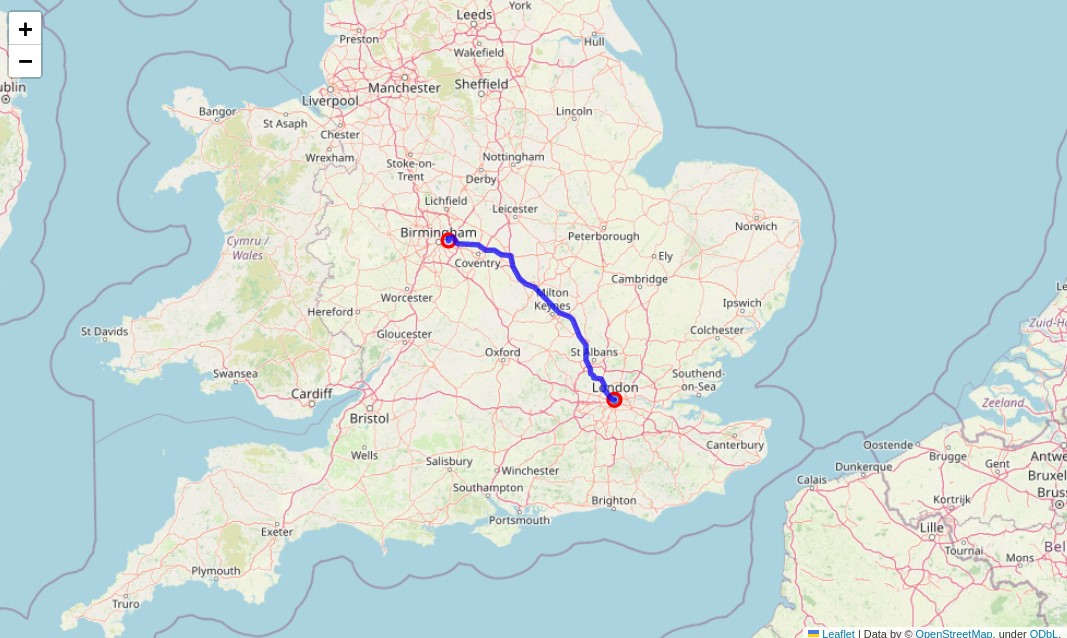

In [5]:
from IPython import display
display.Image("images/route.jpg")

## Integrating Data into Visualisations:

In this section, we will read location data from a file called locations.csv, and visualise the data on the map. We also integrate a superimposed window on the map that shows additional information.

For simplicity, we use the locations we have already worked with (London and Birmingham).

The contents of locations.csv look like this:

```csv
name,region,country,latitude,longitude,location_type,conflict_date,population
London,London,GB,51.50837083467904,-0.13187578769508834,conflict_zone,1,0
Birmingham,Birmingham,GB,52.498968318134516,-1.8030022360693643,conflict_zone,1,0
```

We have added a copy of the locations.csv in the parent directory.

Please run the cell below and see the map.

In [6]:
import pandas as pd
import requests
import folium
import polyline

# Set the file name of the locations.csv file
locations_csv = 'locations.csv'

# Set the path to the directory where route.geojson is stored
locations_csv_path = '.'

# Check if the GeoJSON file exists
if not os.path.exists(os.path.join(locations_csv_path, locations_csv)):
    print(f"Error: {locations_csv} file not found.")
    exit(1)

# Read the locations from CSV
df = pd.read_csv('{}/{}'.format(locations_csv_path, locations_csv))

# Create a map centered around the first location
start_lat = df.loc[0, 'latitude']
start_lon = df.loc[0, 'longitude']
m = folium.Map(location=[start_lat, start_lon], zoom_start=6)

# Create an empty list to store route instructions
route_instructions = []

# Iterate through each pair of locations in the DataFrame
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        # Extract location details
        name1 = df.loc[i, 'name']
        lat1 = df.loc[i, 'latitude']
        lon1 = df.loc[i, 'longitude']
        name2 = df.loc[j, 'name']
        lat2 = df.loc[j, 'latitude']
        lon2 = df.loc[j, 'longitude']

        # Prepare API request URL
        osrm_endpoint = 'http://localhost:5000/route/v1/driving'
        request_url = f"{osrm_endpoint}/{lon1},{lat1};{lon2},{lat2}?steps=true&geometries=polyline"

        # Send request to OSRM
        response = requests.get(request_url)
        route_data = response.json()

        # Check if response contains a route
        if 'routes' in route_data and len(route_data['routes']) > 0:
            # Extract route steps
            steps = route_data['routes'][0]['legs'][0]['steps']
            distance_sum = 0
            for step in steps:
                # Extract step instructions
                instruction = step.get('name', '') or step.get('ref', '')

                # Extract step distance and add to the distance sum
                distance = step['distance']
                distance_sum += distance

                # Append step information to the route_instructions list
                if instruction:
                    route_instructions.append((instruction, distance_sum))

            # Extract route geometry
            geometry = route_data['routes'][0]['geometry']

            # Decode polyline string to get coordinates
            coordinates = polyline.decode(geometry)

            # Create a Folium PolyLine object
            polyline_obj = folium.PolyLine(
                locations=coordinates,
                color='blue',
                weight=2,
                opacity=0.9
            )

            # Add the PolyLine to the map
            polyline_obj.add_to(m)

        # Add markers for the final locations
        folium.CircleMarker(
            location=[lat1, lon1],
            radius=6,
            color='red',
            fill=True,
            fill_color='blue',
            popup=name1
        ).add_to(m)

        # Add markers for the final locations
        folium.CircleMarker(
            location=[lat2, lon2],
            radius=6,
            color='red',
            fill=True,
            fill_color='blue',
            popup=name2
        ).add_to(m)

# Create the side window HTML content
side_window_content = "<h2>Route Instructions:</h2>"
current_distance = 0

for instruction, distance in route_instructions:
    # Convert the distance from meters to kilometers
    distance_km = distance / 1000
    
    # Round the distance to two decimal places
    rounded_distance = round(distance_km, 2)
    
    # Format the instruction line with a colon instead of a hyphen
    formatted_instruction = f"{instruction}: {rounded_distance:.2f} km"
    
    # Add the formatted instruction to the side window content
    side_window_content += f"<p><strong>{formatted_instruction}</strong></p>"
    current_distance = distance

# Create a custom HTML element for the side window
side_window_html = f"""
<div style="position: fixed; 
            font-size: 12px;
            top: 50px; 
            right: 80px; 
            width: 30%; 
            height: 80%;
            background-color:white; 
            border:2px solid grey;
            z-index: 900;
            overflow-x: scroll;
            overflow-y: scroll;
            white-space: nowrap">
            {side_window_content}
</div>
"""

# Add the side window HTML as a custom element to the Figure
m.get_root().html.add_child(folium.Element(side_window_html))

# Save the map as an HTML file
m.save('route_map.html')

print("Map saved as route_map.html")

# Display map
m

Map saved as route_map.html


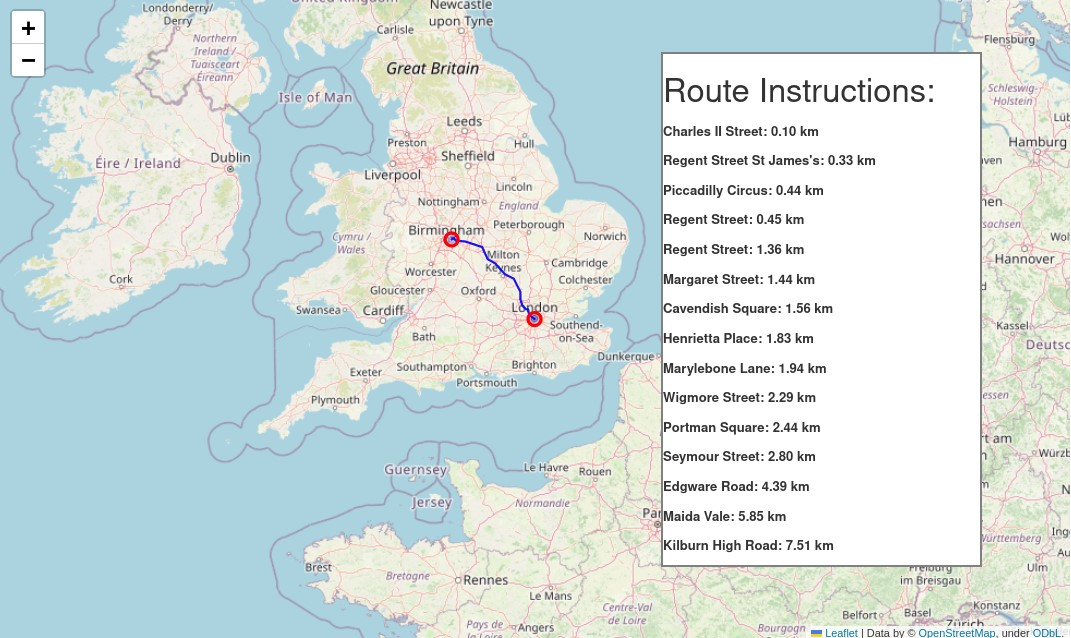

In [7]:
from IPython import display
display.Image("images/route_with_instructions.jpg")

## Construct More Routes

In the code below we read more locations from more_locations.csv file and construct the routes.

A copy of the more_locations.csv is added to the parent directory.

Please run the code below and see the map.

In [8]:
import os
import pandas as pd
import requests
import folium
import polyline

# Set the file name of the locations.csv file
locations_csv = 'more-locations.csv'

# Set the path to the directory where route.geojson is stored
locations_csv_path = '.'

# Check if the CSV file exists
if not os.path.exists(os.path.join(locations_csv_path, locations_csv)):
    print(f"Error: {locations_csv} file not found.")
    exit(1)

# Read the locations from CSV
df = pd.read_csv(os.path.join(locations_csv_path, locations_csv))

# Create a map centered around the first location
start_lat = df.loc[0, 'latitude']
start_lon = df.loc[0, 'longitude']
m = folium.Map(location=[start_lat, start_lon], zoom_start=6)

# Create an empty list to store route instructions
route_instructions = []

# Iterate through each pair of locations in the DataFrame
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        # Extract location details
        name1 = df.loc[i, 'name']
        lat1 = df.loc[i, 'latitude']
        lon1 = df.loc[i, 'longitude']
        name2 = df.loc[j, 'name']
        lat2 = df.loc[j, 'latitude']
        lon2 = df.loc[j, 'longitude']

        # Prepare API request URL
        osrm_endpoint = 'http://localhost:5000/route/v1/driving'
        request_url = f"{osrm_endpoint}/{lon1},{lat1};{lon2},{lat2}?steps=true&geometries=polyline"

        # Send request to OSRM
        response = requests.get(request_url)
        route_data = response.json()
        
        # Check if response contains a route
        if 'routes' in route_data and len(route_data['routes']) > 0:
            # Extract route steps
            steps = route_data['routes'][0]['legs'][0]['steps']
            distance_sum = 0
            for step in steps:
                # Extract step instructions
                instruction = step['name']

                # Extract step distance and add to the distance sum
                distance = step['distance']
                distance_sum += distance

                # Append step information to the route_instructions list
                route_instructions.append((instruction, distance_sum))
        
            # Extract route geometry
            geometry = route_data['routes'][0]['geometry']

            # Decode polyline string to get coordinates
            coordinates = polyline.decode(geometry)

            # Create a Folium PolyLine object
            polyline_obj = folium.PolyLine(
                locations=coordinates,
                color='blue',
                weight=2,
                opacity=0.9
            )

            # Add the PolyLine to the map
            polyline_obj.add_to(m)

        # Add markers for the final locations
        folium.CircleMarker(
            location=[lat1, lon1],
            radius=6,
            color='red',
            fill=True,
            fill_color='blue',
            popup=name1
        ).add_to(m)

        # Add markers for the final locations
        folium.CircleMarker(
            location=[lat2, lon2],
            radius=6,
            color='red',
            fill=True,
            fill_color='blue',
            popup=name2
        ).add_to(m)
    
# Save the map as an HTML file
m.save('route_map.html')

print("Map saved as route_map.html")

# Display the map
m

Map saved as route_map.html


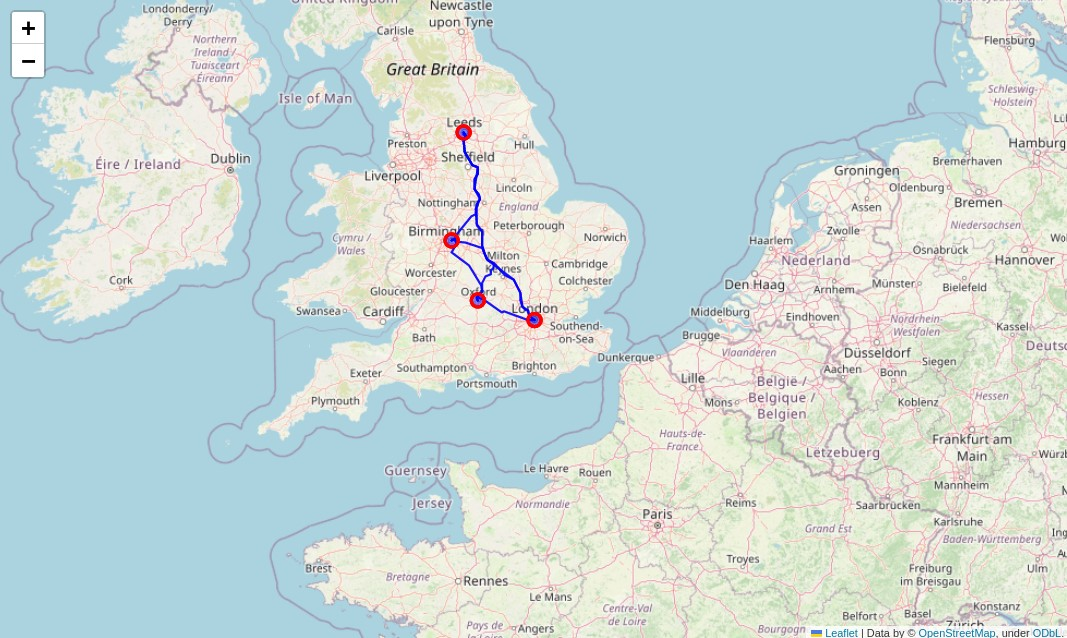

In [9]:
from IPython import display
display.Image("images/routes.jpg")

## Storing Route Data

The code below will save the route coordinates for each location pair in a CSV file called "more_routes.csv" with columns "location" and "coordinates". Each row will represent a location pair, and the "coordinates" column will contain the corresponding polyline coordinates.

In [ ]:
import os
import pandas as pd
import requests
import polyline

# Set the file name of the locations.csv file
locations_csv = 'more-locations.csv'

# Set the path to the directory where route.geojson is stored
locations_csv_path = '.'

# Check if the CSV file exists
if not os.path.exists(os.path.join(locations_csv_path, locations_csv)):
    print(f"Error: {locations_csv} file not found.")
    exit(1)

# Read the locations from CSV
df = pd.read_csv(os.path.join(locations_csv_path, locations_csv))

# Create an empty list to store the route coordinates
route_coordinates = []

# Iterate through each pair of locations in the DataFrame
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        # Extract location details
        name1 = df.loc[i, 'name']
        lat1 = df.loc[i, 'latitude']
        lon1 = df.loc[i, 'longitude']
        name2 = df.loc[j, 'name']
        lat2 = df.loc[j, 'latitude']
        lon2 = df.loc[j, 'longitude']

        # Prepare API request URL
        osrm_endpoint = 'http://localhost:5000/route/v1/driving'
        request_url = f"{osrm_endpoint}/{lon1},{lat1};{lon2},{lat2}?steps=true&geometries=polyline"

        # Send request to OSRM
        response = requests.get(request_url)
        route_data = response.json()
        
        # Check if response contains a route
        if 'routes' in route_data and len(route_data['routes']) > 0:
            # Extract route geometry
            geometry = route_data['routes'][0]['geometry']
            
            # Decode polyline string to get coordinates
            coordinates = polyline.decode(geometry)
            
            # Store the coordinates as a dictionary
            route_coordinates.append({'location': f"{name1} - {name2}", 'coordinates': coordinates})

# Convert the list of dictionaries to a DataFrame
route_coordinates_df = pd.DataFrame(route_coordinates)

# Save the route coordinates DataFrame to a CSV file
route_coordinates_df.to_csv('more_routes.csv', index=False)

print("Route coordinates saved as more_routes.csv")

Please feel free to modify and experiment with the code.